In [1]:
### libraries
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
import itertools
import random
import scipy
import six
import re

from __future__ import print_function
from pprint import pprint
import time as time
import sys
sys.path.append('/Users/tatiana/anaconda/pkgs/seaborn-0.6.0-np110py34_0/lib/python3.4/site-packages')
import seaborn as sns; sns.set()

from time import time

//anaconda/lib/python3.4/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory: 'sysctl'
  stacklevel=stacklevel + 1):


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [3]:
path = r'/Users/tatiana/rest_reviews_2.csv'
reviews = pd.read_csv(path)
reviews['stars_nom'] = ["one" if star == 1 else "two" if star == 2 else "three" if star == 3 
                else "four" if star == 4 else "five" for star in reviews.stars]
reviews = reviews[['stars_nom','text']]
reviews.head()

,stars_nom,text
0,four,This location is located inside the Green Vall...
1,four,"Ok, so the sushi/food itself only really deser..."
2,two,With expectations sufficiently low and my obje...
3,four,I went around 2pm and there was no line! :) ha...
4,two,Thank you to the manager for caring enough to ...


In [4]:
labels = ["one","two","three","four","five"]

def plot_confusion(confmat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confmat)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [5]:
rev_num = [10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

In [10]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(stop_words='english',
                                   max_df=0.7, min_df=100)),
    #('transformer', TfidfTransformer()),
    ('classifier',  MultinomialNB()) ])
nb_times = []
nb_scores = []
for num in rev_num:
    t0 = time()
    reviews_sample = reviews.sample(n = num)
    X_train, X_test, y_train, y_test = train_test_split(reviews_sample.text.values, 
                                                        reviews_sample.stars_nom.values, 
                                                        test_size=0.33)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
        
    nb_times.append(time()-t0)
    nb_scores.append(f1_score(y_test, predictions, labels = labels, average = 'macro'))

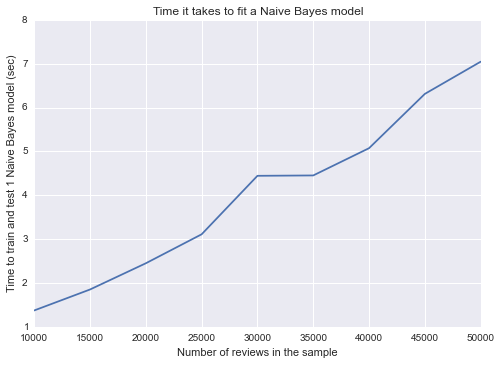

In [11]:
plt.plot(rev_num, nb_times)
plt.xlabel('Number of reviews in the sample')
plt.ylabel('Time to train and test 1 Naive Bayes model (sec)')
plt.title('Time it takes to fit a Naive Bayes model')
plt.show()

In [12]:
rev_num_svm = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

In [14]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1,3), stop_words='english',
                                   max_df=0.7, min_df=100)),
    ('transformer', TfidfTransformer()),
    ('classifier',  SVC(kernel='linear')) ])
svm_times = []
svm_scores = []
for num in rev_num_svm:
    t0 = time()
    reviews_sample = reviews.sample(n = num)
    X_train, X_test, y_train, y_test = train_test_split(reviews_sample.text.values, 
                                                        reviews_sample.stars_nom.values, 
                                                        test_size=0.33)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
        
    svm_times.append(time()-t0)
    svm_scores.append(f1_score(y_test, predictions, labels = labels, average = 'macro'))

//anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


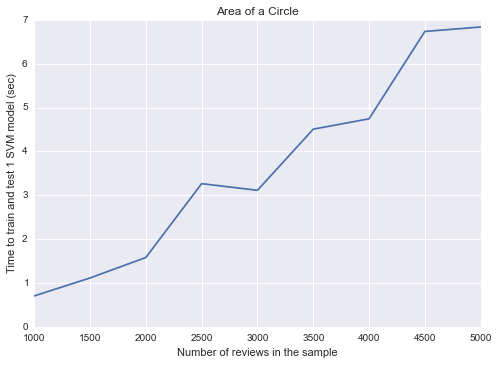

In [15]:
plt.plot(rev_num_svm, svm_times)
plt.xlabel('Number of reviews in the sample')
plt.ylabel('Time to train and test 1 SVM model (sec)')
plt.title('Area of a Circle')
plt.show()

In [16]:
pipeline = Pipeline([
    ('vectorizer',  CountVectorizer(ngram_range=(1,3), stop_words='english',
                                   max_df=0.7, min_df=100)),
    ('transformer', TfidfTransformer()),
    ('classifier',  LogisticRegression(multi_class='multinomial',solver='lbfgs')) ])
lr_times = []
lr_scores = []
for num in rev_num:
    t0 = time()
    reviews_sample = reviews.sample(n = num)
    X_train, X_test, y_train, y_test = train_test_split(reviews_sample.text.values, 
                                                        reviews_sample.stars_nom.values, 
                                                        test_size=0.33)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
        
    lr_times.append(time()-t0)
    lr_scores.append(f1_score(y_test, predictions, labels = labels, average = 'macro'))

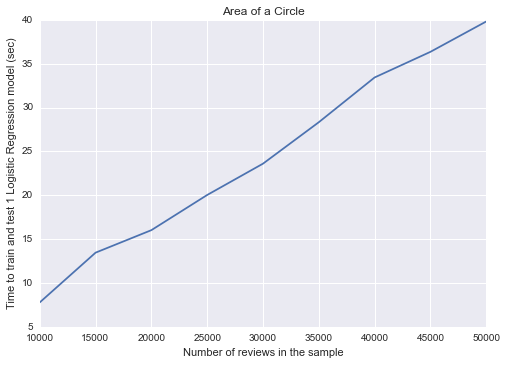

In [17]:
plt.plot(rev_num, lr_times)
plt.xlabel('Number of reviews in the sample')
plt.ylabel('Time to train and test 1 Logistic Regression model (sec)')
plt.title('Area of a Circle')
plt.show()

In [55]:
nb_report = pd.DataFrame(data = ({'NB_time': nb_times,
                                  'NB_scores': nb_scores}))
nb_report

,NB_scores,NB_time
0,0.251145,0.166213
1,0.319506,0.211138
2,0.367946,0.268518
3,0.366117,0.339087
4,0.375231,0.391359
5,0.422510,0.493831
6,0.397572,0.524311
7,0.404705,0.572078
8,0.432841,0.643585
9,0.436162,0.698782
